### 행정구역 정보 분석 및 시각화
1. pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기
2. Data Selection : loc[] / iloc[] 를 사용해서 특정 Row와 Column 선택하기
3. 컬럼명 변경하기
4. DataFrame 객체를 Excel file로 저장하기
5. Data Grouping : groupby() 함수를 사용해서 그룹핑하기
6. 상관관계 분석 : corr() 함수를 사용해서 인구수와 면적간의 상관관계 
7. 시각화 : seaborn의 barplot() 함수를 사용해서 Plot 그리기

In [88]:
import pandas as pd
print(pd.__version__) 

2.3.3


##### pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기

In [89]:
data = pd.read_csv('data/data_draw_korea.csv')
# pd 에 노란 밑줄 나오면,
# Ctrl + Shift + P 하고 파이썬 리스타트

print(data.shape) # 229행 8열
print(type(data)) # 변수 타입

(229, 8)
<class 'pandas.core.frame.DataFrame'>


In [90]:
# head() 함수
data.head(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시


In [91]:
# tail() 함수
data.tail(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [92]:
# * sample() 함수
data.sample()  # default 값이 1 아무 데이터나 랜덤하게 가져옴 

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
64,64,63142,함안,7,17,417.0,경상남도,함안군


In [93]:
# 컬럼명 확인하기
# print(data.columns) |
print(f'{data.columns}') # 이렇게도 가능


Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')


In [94]:
# 인덱스 확인하기
print(f'인덱스 = {data.index}')

인덱스 = RangeIndex(start=0, stop=229, step=1)


In [95]:
# values 속성으로 값과 타입 확인하기
print(type(data.values)) # numpy.ndarray
data.values # 데이터 프레임 

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']],
      shape=(229, 8), dtype=object)

In [96]:
# info() 함수 : 데이터에 대한 전반적인 정보 출력 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [97]:
# 모든 컬럼의 타입 확인
data.dtypes

Unnamed: 0      int64
인구수             int64
shortName      object
x               int64
y               int64
면적            float64
광역시도           object
행정구역           object
dtype: object

In [98]:
data['면적'].dtype

dtype('float64')

1. 시리즈 (Series): "엑셀의 열 하나"
    시리즈는 1차원 데이터 구조입니다. 쉽게 말해, 데이터가 한 줄로 쭉 늘어선 형태예요.

    구조: 데이터 값(Value) + 색인(Index)

    특징: 모든 데이터의 타입이 같아야 합니다. (예: 모두 숫자이거나, 모두 문자열이거나)

    비유: 엑셀 시트에서 딱 **한 개의 열(Column)**만 떼어낸 것이라고 보면 됩니다.

2. 데이터프레임 (DataFrame): "엑셀 표 전체"
    데이터프레임은 2차원 데이터 구조입니다. 여러 개의 시리즈가 옆으로 나란히 붙어 있는 형태죠.

    구조: 행(Row) x 열(Column)

    특징: 각 열마다 데이터 타입이 다를 수 있습니다. (A열은 이름, B열은 나이 등)

    비유: 우리가 흔히 보는 엑셀 워크시트(표) 전체입니다.

In [99]:
# 면적 컬럼의 타입을 확인
# Series (단일 열, 행 데이터 일때 씀) 개념정리
# 두개 이상의 열, 행을 가져올 때는 DataFrame

print(type(data['면적']))
data['면적'] # 시리즈 일때는 표데이터로 나오지 않음 

<class 'pandas.core.series.Series'>


0      1040.07
1       664.19
2       180.01
3      1185.80
4       105.25
        ...   
224     882.47
225      81.84
226     406.08
227     932.51
228     983.70
Name: 면적, Length: 229, dtype: float64

In [100]:
# 특정컬럼(인구수)의 타입 확인
print(type(data['인구수']))
data['인구수'].dtype # 정수형 데이터라 int64

<class 'pandas.core.series.Series'>


dtype('int64')

In [101]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력
# 통계 요약해줌.
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [102]:
# numpy의 np.number 속성을 사용해서 describe() 
import numpy as np
# * 내 데이터프레임에서 '숫자'로 된 컬럼들만 골라서 요약 통계량을 보여줘!
data.describe(include=np.number)

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [103]:
# describe() 함수, 문자열(object) 타입인 컬럼의 통계함수 출력
# * 내 데이터프레임에서 '문자'로 된 컬럼들만 골라서 요약 통계량을 보여줘!
data.describe(include=[object])
#frequency (31번 나옴.)

,shortName,광역시도,행정구역
count,229,229,229
unique,229,17,206
top,강릉,경기도,동구
freq,1,31,6


In [104]:
# 행정구역이 동구인 것
data['행정구역'] == '동구' # 시리즈로 출력

0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Name: 행정구역, Length: 229, dtype: bool

In [105]:
# 해당 조건식과 매칭되는 Row data 출력
data.loc[data['행정구역'] == '동구']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
92,92,97571,광주동구,3,20,48.86,광주광역시,동구
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
104,104,236524,대전동구,5,13,136.80,대전광역시,동구
112,112,85952,부산동구,10,17,9.77,부산광역시,동구
151,151,164738,울산동구,12,14,35.77,울산광역시,동구
159,159,68950,인천동구,1,5,7.05,인천광역시,동구


In [106]:
# '광역시도' == '경기도'
data.loc[data['광역시도'] == '경기도'].reset_index().head() # 인덱스를 새로 생성함 
# drop 을 넣고 안 넣고의 차이 확인 (True 가 디폴트인듯)

,index,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,18,18,53497,가평,9,3,843.040,경기도,가평군
1,19,19,955384,고양,4,2,267.330,경기도,고양시
2,20,20,63227,과천,7,7,35.813,경기도,과천시
3,21,21,327111,광명,3,3,38.500,경기도,광명시
4,22,22,290210,광주,8,7,431.840,경기도,광주시


In [107]:
# describe() 함수, 모든 컬럼(숫자, 문자 타입 모두)의 통계함수 출력
data.describe(include = 'all')

# 문자 데이터는 결측치로 인식됨

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
count,229.000000,2.290000e+02,229,229.000000,229.000000,229.000000,229,229
unique,NaN,NaN,229,NaN,NaN,NaN,17,206
top,NaN,NaN,강릉,NaN,NaN,NaN,경기도,동구
freq,NaN,NaN,1,NaN,NaN,NaN,31,6
mean,114.000000,2.110898e+05,NaN,6.117904,11.262009,435.419795,NaN,NaN
std,66.250786,2.074378e+05,NaN,3.320469,6.040898,381.612549,NaN,NaN
min,0.000000,8.392000e+03,NaN,0.000000,0.000000,2.800000,NaN,NaN
25%,57.000000,4.955900e+04,NaN,3.000000,6.000000,54.000000,NaN,NaN
50%,114.000000,1.401590e+05,NaN,6.000000,11.000000,436.400000,NaN,NaN
75%,171.000000,3.216180e+05,NaN,9.000000,16.000000,692.800000,NaN,NaN


### Data Selection
* loc[] 또는 iloc[]
* loc[Row 선택, Column 선택]

In [108]:
# 인구수 1개의 컬럼 선택
# loc[행, 열]
data['인구수']

0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [109]:
data.loc[:, '인구수']

0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [110]:
# ['행정구역','인구수','면적'] 컬럼의 데이터 출력
data[['행정구역','인구수','면적']]  #Series 가 아닌 데이터 프레임 형태로 나온다.

,행정구역,인구수,면적
0,강릉시,202520,1040.07
1,고성군,25589,664.19
2,동해시,86747,180.01
3,삼척시,63986,1185.80
4,속초시,76733,105.25
...,...,...,...
224,제천시,127462,882.47
225,증평군,34480,81.84
226,진천군,62809,406.08
227,청주시,790216,932.51


In [111]:
''' loc 의 인덱싱 : index 0 부터 index 10까지 '''
data.loc[0:10, ['행정구역','인구수','면적']] # 이렇게도 가능

,행정구역,인구수,면적
0,강릉시,202520,1040.07
1,고성군,25589,664.19
2,동해시,86747,180.01
3,삼척시,63986,1185.80
4,속초시,76733,105.25
5,양구군,20809,700.80
6,양양군,24551,628.68
7,영월군,34966,1127.36
8,원주시,313851,867.30
9,인제군,29260,1646.08


In [112]:
# 인구수 컬럼의 집계함수
print(f"인구수 최대값 {data['인구수'].max():,}") # 인구수 컬럼의 최댓값 , 3자리 단위로 콤마
print(f"인구수 최소값 {data['인구수'].min():,}") #최솟값
print(f"인구수 평균 {round(data['인구수'].mean()):,}") # 평균은 mean 이지만 round로 반올림
print(f"인구수 표준편차 {round(data['인구수'].std()):,}") # 표준편차
print(f"인구수 중간값 {data['인구수'].median():,}") # 중간값
data['인구수'].quantile([0.25, 0.75]) # 4분위

인구수 최대값 1,125,461
인구수 최소값 8,392
인구수 평균 211,090
인구수 표준편차 207,438
인구수 중간값 140,159.0


0.25     49559.0
0.75    321618.0
Name: 인구수, dtype: float64

In [113]:
# 인구수가 가장 많은 행정구역?
# 인구수의 최대값을 max_popu 변수에 저장 population
max_popu = data['인구수'].max()
print(max_popu)
#data['인구수'] == max_prop
data.loc[data['인구수'] == max_popu]


1125461


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [114]:
# 면적이 넓은 행정구역?
data.loc[data['면적'] == data['면적'].max()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
15,15,62957,홍천,10,4,1817.94,강원도,홍천군


In [115]:
# 인구수가 가장 적은 행정구역?
data.loc[data['인구수'] == data['인구수'].min()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
83,83,8392,울릉,13,6,72.82,경상북도,울릉군


In [116]:
# unique한 광역시도명
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [117]:
# 광역시도별 Row Counting
data['광역시도'].value_counts()

광역시도
경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [118]:
# data['광역시도'] == '경기도' 의 ['행정구역','인구수','면적']  컬럼의 데이터 출력하기, 인구수가 많은 순서대로 정렬, 인덱스 재설정 
data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']]\
    .sort_values(by='인구수', ascending = True)\
        .reset_index(drop=True).head() # 인구수 기준으로 정렬
# 기본은 ascending = True (오름차순)
# loc[row, column]

,행정구역,인구수,면적
0,연천군,41076,695.230
1,가평군,53497,843.040
2,과천시,63227,35.813
3,동두천시,90398,95.680
4,양평군,95614,877.080


In [119]:
data.loc[data['행정구역'] == '속초시', ['광역시도','인구수','면적']].sort_values(by='면적', ascending=True).reset_index(drop=True)

,광역시도,인구수,면적
0,강원도,76733,105.25


In [120]:
# data['광역시도'] == '경기도' 의 ['행정구역','인구수','면적']  컬럼의 데이터를 면적을 descending 순서대로 출력하기
data.loc[data['광역시도'] == '경기도', ['행정구역', '인구수','면적']].sort_values(by='면적', ascending=False) \
    .head(5)

,행정구역,인구수,면적
36,양평군,95614,877.08
18,가평군,53497,843.04
46,포천시,140159,826.38
38,연천군,41076,695.23
48,화성시,555129,688.10


In [121]:
#경기도에 속한 행정구역명, 인구수, 면적 선택하기 인구수를 descending 순서대로 출력하고 index reset 하여 gy_df 라는 변수에 저장하기
#data.loc[조건 , 출력할 columns]
gy_df = data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by = '인구수', ascending = False).reset_index(drop=True)
gy_df.head()

,행정구역,인구수,면적
0,수원시,1125461,121.09
1,고양시,955384,267.33
2,용인시,915005,591.50
3,성남시,911628,141.82
4,부천시,805473,53.44


In [122]:
# 인구수2 라는 새로운 컬럼을 생성
gy_df['인구수2'] = gy_df['인구수'].map(lambda val:f"{val:,}")

Python Lambda 및 Map 함수 분석
이 코드는 데이터프레임의 특정 열에 있는 숫자 데이터를 천 단위 구분 기호(쉼표)가 포함된 문자열 형식으로 변환하여 새로운 열을 생성하는 과정입니다.

주요 구성 요소 설명
.map(): 시리즈(Series)의 각 요소를 하나씩 꺼내어 특정 함수를 적용하는 매핑 메서드입니다.

lambda val:: 익명 함수입니다. val이라는 이름으로 입력값을 받아 오른쪽에 정의된 식을 실행합니다.

f"{val:,}": 파이썬의 f-string 포맷팅입니다. : 뒤에 ,를 붙이면 숫자에 천 단위마다 쉼표를 삽입합니다.

단계별 처리 과정   
Step 1: gy_df['인구수'] 열에서 데이터를 하나씩 추출합니다.

Step 2: 추출된 값(예: 1234567)이 lambda 함수의 val로 전달됩니다.

Step 3: f"{val:,}" 식에 의해 1,234,567이라는 문자열로 변환됩니다.

Step 4: 변환된 값들이 gy_df['인구수2']라는 새로운 열에 순차적으로 저장됩니다.

In [123]:
gy_df[['인구수', '인구수2']].head(3)

,인구수,인구수2
0,1125461,"1,125,461"
1,955384,"955,384"
2,915005,"915,005"


In [124]:
gy_df[['면적']].head(3) #소수점 둘째자리까지 나오네요

,면적
0,121.09
1,267.33
2,591.50


In [125]:
gy_df['면적2'] = gy_df['면적'].map(lambda val:f'{val:.2f}') # 소수점 둘째 자리까지 고정하여 문자열로 변환
gy_df[['면적','면적2']].head(3)

,면적,면적2
0,121.09,121.09
1,267.33,267.33
2,591.50,591.50


f'{val:.2f}': f-string의 포맷 사양(Format Specifier)입니다.

.: 소수점을 의미합니다.

2: 소수점 아래로 표시할 자릿수를 나타냅니다.

f: 부동 소수점(Floating point) 형식을 지정합니다.

In [126]:
# 면적이 > 1000 큰 조건과 매핑되는 새로운 DataFrame 생성 area_1000 라는 변수에 저장하기
# 컬럼명은 ['행정구역', '인구수', '면적']

area_1000 = data.loc[data['면적'] > 1000].copy()
area_1000.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
7,7,34966,영월,10,8,1127.36,강원도,영월군
9,9,29260,인제,9,2,1646.08,강원도,인제군
10,10,34242,정선,11,6,1220.67,강원도,정선군


In [127]:
# area_1000 DataFrame 객체에 면적2 컬럼을 생성 (3자리 단위로, 콤마가 표시된 값으로 )
area_1000.loc[:, '면적2'] = area_1000['면적'].map('{:,}'.format)
# [:, '면적2'] >> 왼쪽은 모든 행, 오른쪽은 '면적2' 변수만
# area_1000['면적'] 값을 콤마 세자리 단위로 자른 걸 '면적2'에 넣음 

.map() 메서드의 작동 원리
.map() 함수는 인자로 '함수 자체'를 기다립니다.

.format 방식: "{:,}".format은 그 자체로 숫자를 받아서 콤마를 찍어주는 함수(메서드)입니다. 따라서 map 안에 바로 넣어서 "이 규칙대로 데이터를 처리해!"라고 전달할 수 있습니다.

f-string 방식: f"{val:,}"은 함수가 아니라 결과값(문자열)입니다. map 안에 f"{val:,}"을 그냥 쓰면, val이 무엇인지 알 수 없기 때문에 오류가 발생합니다.

f-string을 사용하고 싶을 때
f-string을 사용하려면 반드시 lambda를 통해 함수의 형태로 감싸주어야 합니다.

f-string 사용 시 (함수로 감쌈): area_1000['면적'].map(lambda val: f"{val:,}")

format 사용 시 (이미 함수임): area_1000['면적'].map("{:,}".format)

즉, lambda를 쓰기 귀찮을 때 파이썬에 내장된 .format 함수를 그대로 가져다 쓰는 것이 두 번째 코드의 의도입니다.

In [128]:
area_1000.loc[:, ['면적', '면적2']].sort_values(by ='면적', ascending=False).head()

,면적,면적2
15,1817.94,"1,817.94"
9,1646.08,"1,646.08"
77,1519.00,"1,519.0"
14,1463.65,"1,463.65"
68,1323.85,"1,323.85"


In [129]:
# ★ 면적 컬럼의 값이 1500인 Row에만 면적3 이라는 새로운 컬럼의 값이 적용 되도록

area_1000.loc[area_1000['면적'] >= 1500, '면적3'] = area_1000['면적'].map('{:,}'.format)
# 1500보다 작은 면적 값들은 면적3 열에 NaN 값으로 삽입됨

In [130]:
area_1000.loc[:, ['면적', '면적2', '면적3']].sort_values(by ='면적', ascending=False).head()

,면적,면적2,면적3
15,1817.94,"1,817.94","1,817.94"
9,1646.08,"1,646.08","1,646.08"
77,1519.00,"1,519.0","1,519.0"
14,1463.65,"1,463.65",NaN
68,1323.85,"1,323.85",NaN


In [131]:
#경기도 인구수의 평균과 표준편차
print(f"경기도 인구 수 평균 = {gy_df['인구수'].mean()}")
print(f"경기도 인구 수 평균 =  {gy_df['인구수'].mean():.2f}")
print(f"경기도 인구 수 표준편차 = {gy_df['인구수'].std():.2f}")

경기도 인구 수 평균 = 378845.48387096776
경기도 인구 수 평균 =  378845.48
경기도 인구 수 표준편차 = 304548.40


In [132]:
#광역시도명을 인자로 받아서 해당 광역시에 속한 행정구역들의 인구수의 평균과 편차 구하기
def pop_mean_std(df, sido_name):
    print(f'==> {sido_name} 인구수의 평균과 편차 <==')
    sido_df = df.loc[df['광역시도'] == sido_name, '인구수':'행정구역'].copy()  # 인구수부터 행정구역까지
    # print(sido_df.shape)
    print(f" {sido_name} = {sido_df['인구수'].mean()}")
    print(f" {sido_name} = {sido_df['인구수'].std()}")

In [133]:
def pop_mean_std(df, sido_name):
    print(f'==> {sido_name}의 인구수의 평균과 표준편차')
    df_sido = df.loc[df['광역시도'] == sido_name, '인구수':'행정구역'].copy()
    print(df_sido.shape)
    print(f"{sido_name}의 인구수 평균 = {df_sido['인구수'].mean()}")
    print(f"{sido_name}의 인구수 표준편차 = {df_sido['인구수'].std():.2f}")

In [134]:
pop_mean_std(data, '경기도')

==> 경기도의 인구수의 평균과 표준편차
(31, 7)
경기도의 인구수 평균 = 378845.48387096776
경기도의 인구수 표준편차 = 304548.40


In [135]:
# Unique한 광역시도명 순회하면서  광역시도명을 출력합니다. 
for sido_name in data['광역시도'].unique():
    pop_mean_std(data, sido_name)


==> 강원도의 인구수의 평균과 표준편차
(18, 7)
강원도의 인구수 평균 = 79413.22222222222
강원도의 인구수 표준편차 = 87316.38
==> 경기도의 인구수의 평균과 표준편차
(31, 7)
경기도의 인구수 평균 = 378845.48387096776
경기도의 인구수 표준편차 = 304548.40
==> 경상남도의 인구수의 평균과 표준편차
(18, 7)
경상남도의 인구수 평균 = 174693.72222222222
경상남도의 인구수 표준편차 = 245796.47
==> 경상북도의 인구수의 평균과 표준편차
(23, 7)
경상북도의 인구수 평균 = 109085.39130434782
경상북도의 인구수 표준편차 = 124954.74
==> 광주광역시의 인구수의 평균과 표준편차
(5, 7)
광주광역시의 인구수 평균 = 287641.8
광주광역시의 인구수 표준편차 = 137076.68
==> 대구광역시의 인구수의 평균과 표준편차
(8, 7)
대구광역시의 인구수 평균 = 297306.25
대구광역시의 인구수 표준편차 = 174375.39
==> 대전광역시의 인구수의 평균과 표준편차
(5, 7)
대전광역시의 인구수 평균 = 293535.4
대전광역시의 인구수 표준편차 = 111853.57
==> 부산광역시의 인구수의 평균과 표준편차
(16, 7)
부산광역시의 인구수 평균 = 207724.4375
부산광역시의 인구수 표준편차 = 106246.04
==> 서울특별시의 인구수의 평균과 표준편차
(25, 7)
서울특별시의 인구수 평균 = 375792.28
서울특별시의 인구수 표준편차 = 125231.25
==> 세종특별자치시의 인구수의 평균과 표준편차
(1, 7)
세종특별자치시의 인구수 평균 = 191233.0
세종특별자치시의 인구수 표준편차 = nan
==> 울산광역시의 인구수의 평균과 표준편차
(5, 7)
울산광역시의 인구수 평균 = 221117.0
울산광역시의 인구수 표준편차 = 64163.29
==> 인천광역시의 인구수의 평균과 표준편차
(10, 7)
인천

| 구분 | **loc** (Label-based) | **iloc** (Integer-based) |
| :--- | :--- | :--- |
| **기반** | **라벨(이름)** 기반 | **정수(위치)** 기반 |
| **사용 예시** | `df.loc['row_name', 'col_name']` | `df.iloc[0, 1]` |
| **슬라이싱** | **끝값 포함** (`start:end`) | **끝값 제외** (`start:end-1`) |
| **비유** | 명칭 주소 (예: "서울시청") | 좌표 주소 (예: "37.56, 126.97") |

In [136]:
#loc[] 사용
#인덱스가 20 부터 25까지
data.loc[20:25]


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시


In [137]:
#iloc[] 사용
#인덱스가 20 부터 24까지
data.iloc[20:25]  # iloc 는 기존 인덱싱(-1)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시


In [138]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [139]:
# iloc[row index, column index] 사용 
# 인덱스가 20 부터 25까지 컬럼이 인구수부터 행정구역 까지
data.iloc[20:25, 1:8]

,인구수,shortName,x,y,면적,광역시도,행정구역
20,63227,과천,7,7,35.813,경기도,과천시
21,327111,광명,3,3,38.500,경기도,광명시
22,290210,광주,8,7,431.840,경기도,광주시
23,175676,구리,9,4,33.300,경기도,구리시
24,273302,군포,5,8,36.350,경기도,군포시


In [140]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역
data.loc[[40,55,60],['인구수', '광역시도', '행정구역']]

,인구수,광역시도,행정구역
40,915005,경기도,용인시
55,106388,경상남도,사천시
60,56734,경상남도,창녕군


In [141]:
#인덱스가 0인 행 하나만 선택
print(type(data.loc[0]))  #Series 형식
data.loc[0]

<class 'pandas.core.series.Series'>


Unnamed: 0          0
인구수            202520
shortName          강릉
x                  11
y                   4
면적            1040.07
광역시도              강원도
행정구역              강릉시
Name: 0, dtype: object

In [142]:
#열 하나만 선택
print(type(data[['행정구역']])) # 대괄호 하나 더 해주면 DataFrame으로 바뀐다. 
data['행정구역'].head()

<class 'pandas.core.frame.DataFrame'>


0    강릉시
1    고성군
2    동해시
3    삼척시
4    속초시
Name: 행정구역, dtype: object

### 컬럼명 변경하기, 컬럼을 인덱스 전환하기
* rename() 함수
* inPlace=False (default) 원본 DataFrame객체를 변경하지 않고, 변경한 결과만 출력한다.
* inPlace=True 원본 DataFrame객체를 변경하고, 변경한 결과는 출력하지 않는다.

In [148]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [149]:
# 'Unnamed: 0' 컬럼명을 'seq' 로 변경한다. 원본 객체는 변경되지 않고 변경된 결과만 출력함
data.rename(columns = {'Unnamed: 0':'seq'}, inplace = False)  # 원본 객체 변경x 

# rename(columns={...}): 딕셔너리 형태({'기존이름': '새이름'})로 매핑하여 열의 헤더(Header) 정보를 수정합니다.
#Unnamed 는 보통 데이터프레임(data) 내의 잘못되거나 불명확한 열 이름'Unnamed: 0'을 직관적인 이름('seq')으로 변경

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시


In [151]:
#원본 객체가 변경되고 변경된 결과는 출력하지 않는다.
data.rename(columns = {'Unnamed: 0':'seq'}, inplace = True)
data.columns

Index(['seq', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [152]:
# seq 컬럼을 인덱스로 변경한다 
# set_index() 함수 사용, inplace 속성이 동일하게 적용됨
# data.set_index('seq').head() > 원본 데이터는 바뀌지않음
data.set_index('seq', inplace = True)

In [156]:
data.head() 

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


### DataFrame을 Excel file로 저장하기
* 인구수가 평균보다 작은 행정구역, 광역시도, 인구수를 선택해서 DataFrame생성하기
* DataFrame의 to_excel() 함수 사용

In [157]:
# 인구수의 평균값 구하기
pop_mean_value=data['인구수'].mean()

print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')

211089.77729257641
211090
211089.78


In [158]:
# ★
# 인구수의 평균값보다 작은 Row를 선택하고, '광역시도','행정구역','인구수' 컬럼값을 가져오기
# 정렬할때 광역시도는 ascending으로 , 인구수는 descending
pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_value, ['광역시도','행정구역','인구수']].sort_values(by=['광역시도','인구수'], ascending=[True, False])\
    .reset_index(drop=True)
print(pop_mean_lt_df.shape)

(141, 3)


In [307]:
# DataFrame의 to_excel() 함수를 사용하여 excel 파일로 저장
pop_mean_lt_df.to_excel('data/평균인구수미만행정구역.xlsx')

### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
* Series 객체의 groupby(data['광역시도']) 함수는 컬럼의 값을 인자로 전달하고
* DataFrame 객체의 groupby('광역시도') 함수는 컬럼명을 인자로 전달합니다.

In [160]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도'])

In [161]:
data[['인구수']].groupby(data['광역시도'])

In [ ]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object ★
data.groupby('광역시도').sum(numeric_only=True) #데이터프레임 형식 ([열]을 지정해주지 않음 )

# numeric_only = True
# 문자열(String) 등 숫자가 아닌 데이터는 계산에서 제외합니다. 이를 설정하지 않으면 문자열끼리 이어 붙여지는 오류나 경고가 발생할 수 있습니다.
# groupby 메서드는 이미 data라는 데이터프레임 객체 내부에서 호출되고 있기 때문에, 굳이 data['광역시도']라고 전체 경로(Series 객체)를 지정할 필요가 없습니다.
# data['광역시도'] 안해도 되는 이유

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


### **Pandas GroupBy 출력 형태 비교**

| 구문 (Syntax) | 결과 타입 (Type) | 차원 (Dimension) | 설명 |
| :--- | :--- | :--- | :--- |
| `data.groupby(...)['인구수']` | **Series** | **1차원** | 인덱스와 값만 있는 **배열** 형태. (헤더 정보가 단순화됨) |
| `data.groupby(...)[['인구수']]` | **DataFrame** | **2차원** | 행과 열을 갖춘 **표** 형태. (구조적 정보를 유지함) |

---

### **핵심 요약**
* **대괄호 1개 (`[]`)**: "내용물만 꺼내줘" $\rightarrow$ **Series 반환**
* **대괄호 2개 (`[[]]`)**: "표(List) 형태로 담아서 꺼내줘" $\rightarrow$ **DataFrame 반환**

In [ ]:
# DataFrameGroupBy 
data.groupby('광역시도')['인구수'].sum()  # '인구수'라고 콕 집어서 하나의 열만 선택했기 때문에 시리즈 형식으로 나온다. 
#numeric True 하면 숫자 데이터 타입만 준다

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [ ]:
data.groupby('광역시도')[['인구수']].sum().head()  # 결과를 데이터프레임으로 보고싶을 때 

,인구수
광역시도,
강원도,1429438
경기도,11744210
경상남도,3144487
경상북도,2508964
광주광역시,1438209


In [165]:
# 광역시도별 행정구역별 인구수의 합계
data.groupby(['광역시도', '행정구역']).sum(numeric_only=True)

인구수   x   y       면적
광역시도 행정구역                         
강원도  강릉시   202520  11   4  1040.07
     고성군    25589   9   0   664.19
     동해시    86747  11   5   180.01
     삼척시    63986  11   8  1185.80
     속초시    76733   9   1   105.25
...           ...  ..  ..      ...
충청북도 제천시   127462   8  10   882.47
     증평군    34480   6  11    81.84
     진천군    62809   5  11   406.08
     청주시   790216   6  12   932.51
     충주시   198077   6  10   983.70

[229 rows x 4 columns]

In [180]:
group_df = data.groupby(['광역시도', '행정구역'])['인구수'].sum()

In [181]:
group_df

광역시도  행정구역
강원도   강릉시     202520
      고성군      25589
      동해시      86747
      삼척시      63986
      속초시      76733
               ...  
충청북도  제천시     127462
      증평군      34480
      진천군      62809
      청주시     790216
      충주시     198077
Name: 인구수, Length: 229, dtype: int64

In [171]:
# data/광역시도별행정구역별인구수의합계.xlsx 파일로 저장하기
group_df.to_excel('data/광역시도별행정구역별인구수.xlsx', sheet_name = '인구수합계')

### 엑셀 수치 데이터에 콤마찍기
[pandas.ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

In [172]:
%pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')
# 1 엔진 설정 (pd.ExcelWriter): 엑셀 파일을 작성하기 위한 xlsxwriter 엔진을 초기화

# Convert the dataframe to an XlsxWriter Excel object.
group_df.to_excel(writer, sheet_name='인구수합계')
# 2. 데이터 쓰기 (to_excel): 데이터프레임의 내용을 시트에 기록

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']
# 3. 객체 접근 (writer.book, writer.sheets): Pandas의 추상화된 계층 아래에 있는 xlsxwriter의 고유 객체(워크북, 워크시트)에 직접 접근

# ★ Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'}) # '#,###': 숫자에 3자리마다 콤마를 찍는 서식을 생성합니다.
worksheet.set_column('C:C', None, num_format) # 'C:C': 엑셀의 C열 전체에 이 서식을 적용합니다.

# Close the Pandas Excel writer and output the Excel file.
writer.close() #_save() 저장 및 종료

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [316]:
#전국의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

np.float64(-0.3460351605045768)

In [176]:
#서울의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도'] == '서울특별시',['행정구역','인구수','면적']]
seoul_df['면적'].corr(seoul_df['인구수'])

np.float64(0.6644268188909778)

In [177]:
#경기도의 면적과 인구수의 상관계수 구하기
gy_df['면적'].corr(gy_df['인구수'])

np.float64(-0.21572485071590813)

In [ ]:
for sido_name in data['광역시도'].unique():
    print(f'{sido_name} 인구수와 면적간의 상관계수 = ') 
    sido_df = data.loc[data['광역시도'] == sido_name,['행정구역','인구수','면적']]
    print(sido_df['면적'].corr(sido_df['인구수']))

#### Groupby 한 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수
* agg(['max','mean','std'])

agg 는 무조건 DataFrame으로 나옴 

In [ ]:
# agg 함수 예시
# 1. 여러 함수 동시 적용 (리스트 사용)
df.groupby('부서')['연봉'].agg(['min', 'max', 'mean'])

# 2. 열마다 다른 함수 적용 (딕셔너리 사용)
df.groupby('부서').agg({'연봉': 'mean', '인원': 'sum'})

In [ ]:
# agg() 함수 사용하여 여러개의 통계함수를 사용합니다. 
# fillna(0) NaN 을 0 으로 변경해 줌
data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0) # 결측치 값 0으로 

,max,mean,std
광역시도,,,
강원도,313851,79413.222222,87316.383238
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
경상북도,488395,109085.391304,124954.740885
광주광역시,439683,287641.800000,137076.683206
대구광역시,584517,297306.250000,174375.394380
대전광역시,475094,293535.400000,111853.571882
부산광역시,397134,207724.437500,106246.041384
서울특별시,615487,375792.280000,125231.247975


In [183]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0)
group_agg_df

,max,mean,std
광역시도,,,
강원도,313851,79413.222222,87316.383238
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
경상북도,488395,109085.391304,124954.740885
광주광역시,439683,287641.800000,137076.683206
대구광역시,584517,297306.250000,174375.394380
대전광역시,475094,293535.400000,111853.571882
부산광역시,397134,207724.437500,106246.041384
서울특별시,615487,375792.280000,125231.247975


In [184]:
# DataFrame의 style.format() 함수 사용하기
# 일시적 실제로 바뀌지는 않음 
group_agg_df.style.format('{0: .2f}')

,max,mean,std
광역시도,,,
강원도,313851.00,79413.22,87316.38
경기도,1125461.00,378845.48,304548.40
경상남도,1010040.00,174693.72,245796.47
경상북도,488395.00,109085.39,124954.74
광주광역시,439683.00,287641.80,137076.68
대구광역시,584517.00,297306.25,174375.39
대전광역시,475094.00,293535.40,111853.57
부산광역시,397134.00,207724.44,106246.04
서울특별시,615487.00,375792.28,125231.25


In [185]:
# 컬럼의 값을 변경하기 map() 함수를 사용하여 포맷하기
group_agg_df['mean'] = group_agg_df['mean'].map('{:.2f}'.format)
group_agg_df['std'] = group_agg_df['std'].map('{:.2f}'.format)
group_agg_df.sort_values(by='std', ascending = False)

,max,mean,std
광역시도,,,
강원도,313851,79413.22,87316.38
전라남도,263166,77298.32,74413.25
울산광역시,327270,221117.00,64163.29
경기도,1125461,378845.48,304548.40
경상남도,1010040,174693.72,245796.47
충청북도,790216,134974.55,223460.36
제주특별자치도,430504,287936.50,201620.89
인천광역시,527153,276657.50,199353.60
대구광역시,584517,297306.25,174375.39


#### 시각화
* %matplotlib inline 설정
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [324]:
%matplotlib inline

In [186]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.10.6
seaborn  0.13.2


In [187]:
# 폰트이름과 폰트파일 정보 출력 list comprehension 
#for font in fm.fontManager.ttflist:
    #print((font.name, font.fname))
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ] # if 'Mal' in font.name 

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf')]

In [188]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

Malgun Gothic


In [189]:
# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
matplotlib.rc('font', family=font_name)

### Figure, Axes, Plot
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간 : Figure을 여러개의 Axes로 분할해서 Plot를 그릴 수 있다
* 비교) Axis는 X 축, Y축
* seaborn의 barplot() 함수(막대그래프) 사용

In [191]:
seoul_df.reset_index(drop=False).head()

,seq,행정구역,인구수,면적
0,124,강남구,526157,39.5
1,125,강동구,432028,24.6
2,126,강북구,310292,23.6
3,127,강서구,554709,41.4
4,128,관악구,484478,29.6


In [193]:
seoul_df.reset_index(drop=True).head()

,행정구역,인구수,면적
0,강남구,526157,39.5
1,강동구,432028,24.6
2,강북구,310292,23.6
3,강서구,554709,41.4
4,관악구,484478,29.6


Figure(1800x1200)
Axes(0.125,0.11;0.775x0.35)
Axes(0.125,0.53;0.775x0.35)


<Axes: xlabel='행정구역', ylabel='인구수'>

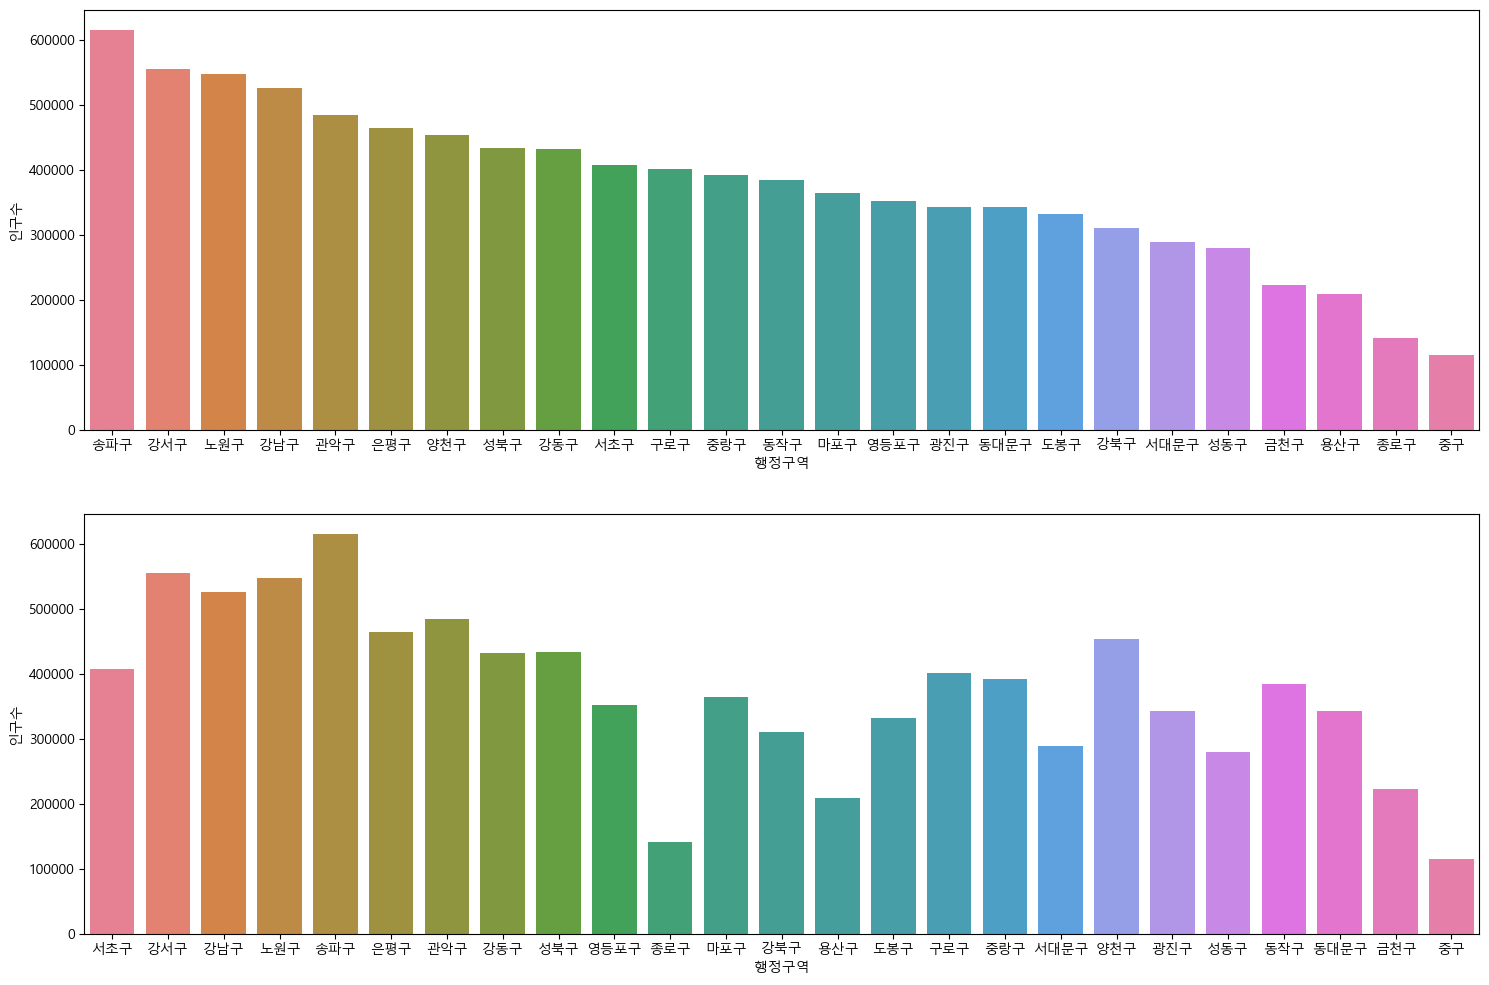

In [330]:
# subplots() 함수를 사용하여 axes 객체를 생성하기
figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1) #2행 1열
figure.set_size_inches(18,12)
print(figure)
print(axes2)
print(axes1)

# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
sns.barplot(data=seoul_df.sort_values(by='인구수', ascending=False),\
             x='행정구역', y='인구수', ax=axes1, hue='행정구역')

# seaborn의 barplot() 함수 호출하기 - 행정구역과 면적
sns.barplot(data=seoul_df.sort_values(by='면적', ascending=False), x='행정구역', y='인구수', ax=axes2, hue='행정구역')

# plt.show()


In [331]:
data

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군


In [332]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    # 입력받은 광역시도에 해당하는 DataFrame 객체생성
    sido_df = data.loc[data['광역시도'] == sido_name]
    # Figure와 Axes 객체 생성
    figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    # Figure size 확대
    figure.set_size_inches(18,12)
    
    pop_plot = sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1,hue='행정구역')
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2,hue='행정구역')
    area_plot.set_title(f'{sido_name} 행정구역별 면적')
    plt.show()    

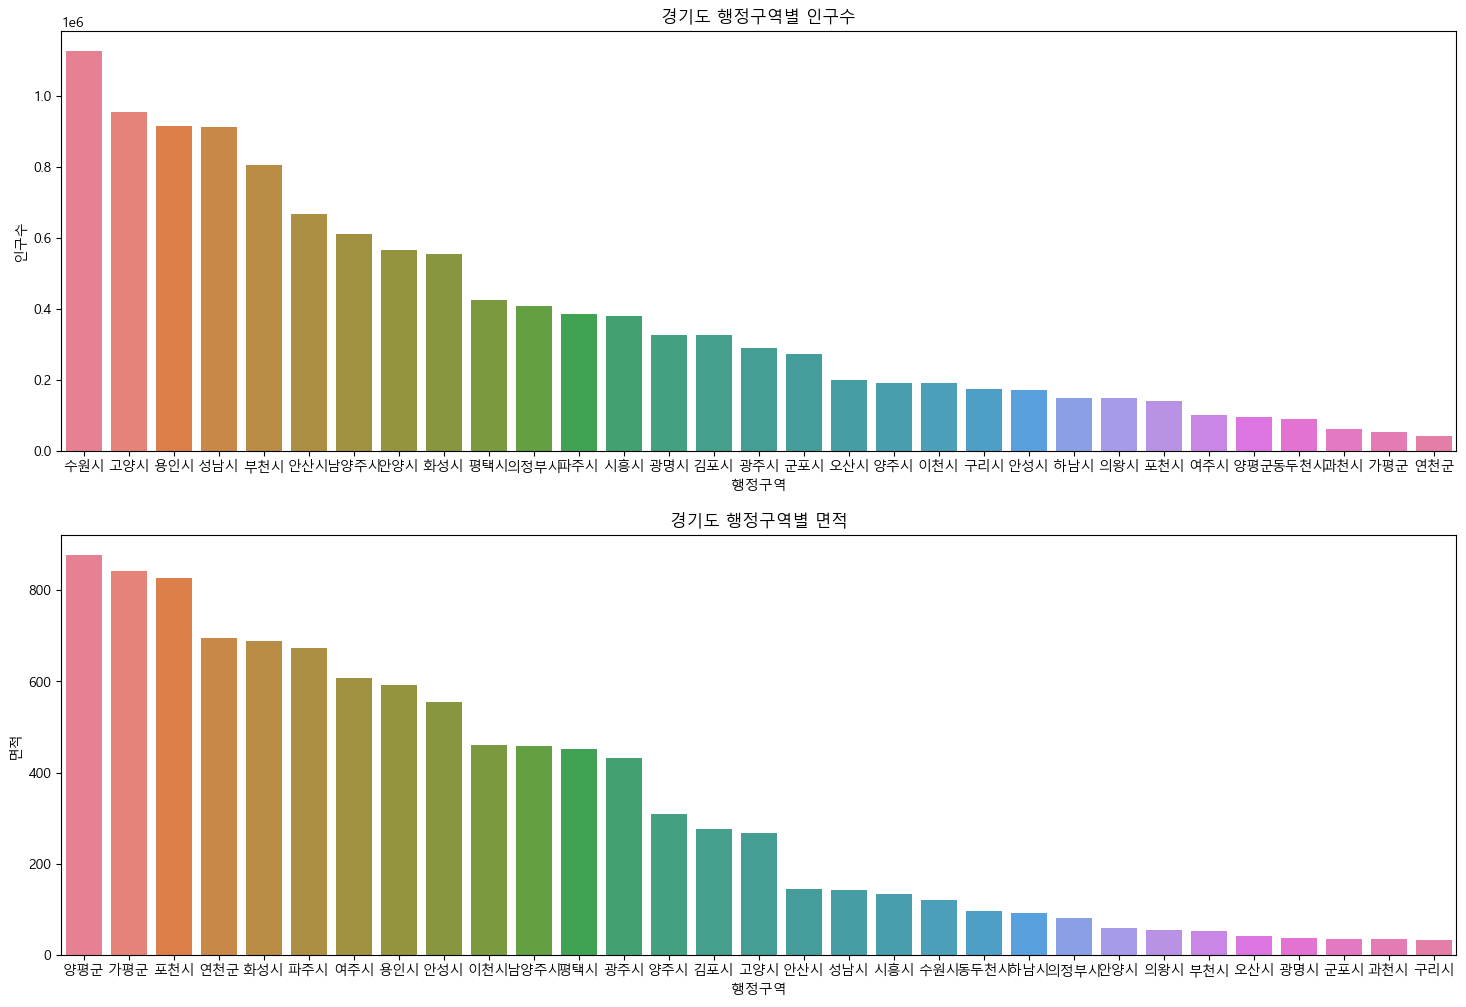

In [333]:
show_pop_area('경기도')

<Axes: xlabel='광역시도', ylabel='인구수'>

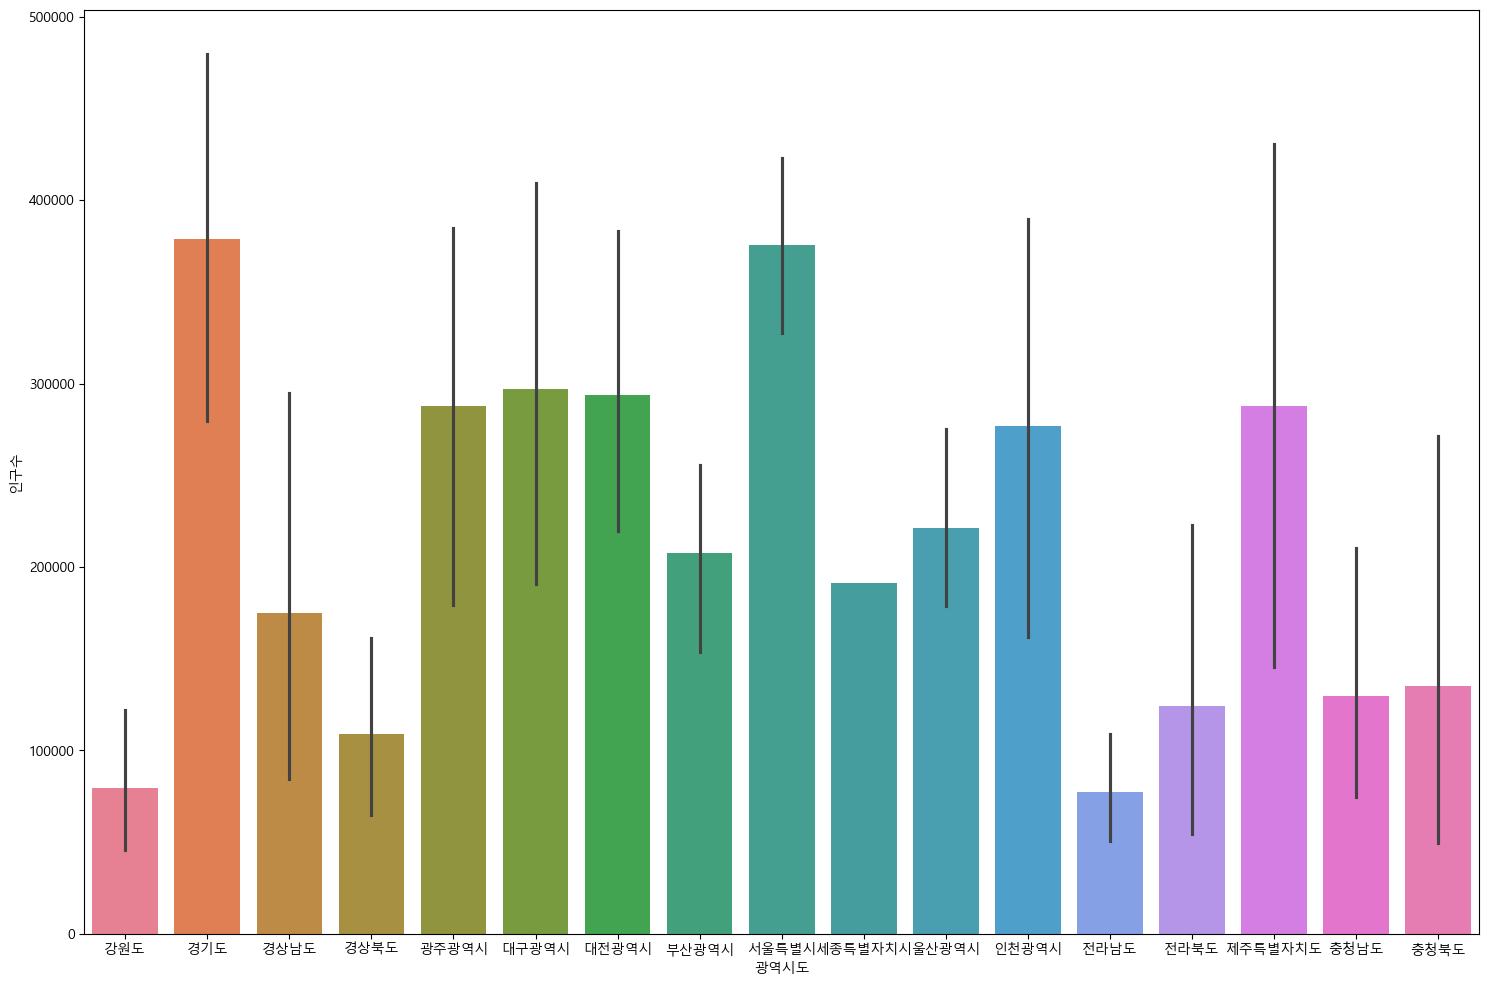

In [336]:
# 전국데이터의 광역시도의 인구수 
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

sns.barplot(data=data, x='광역시도', y='인구수', ax=axes1, hue='광역시도') #검은선이 표준편차

In [ ]:
print(type(seoul_df["인구수"].items()))  # Series 의 items 함수
seoul_df['인구수'].items()

<class 'zip'>


In [341]:
for i, v in enumerate(seoul_df["인구수"].items()):
    print(i,v[1]) 
    # print(i, v)

0 526157
1 432028
2 310292
3 554709
4 484478
5 342909
6 401233
7 222566
8 547202
9 331682
10 342429
11 383917
12 364232
13 288543
14 407416
15 279939
16 434061
17 615487
18 453634
19 351837
20 208603
21 464236
22 140595
23 114967
24 391655


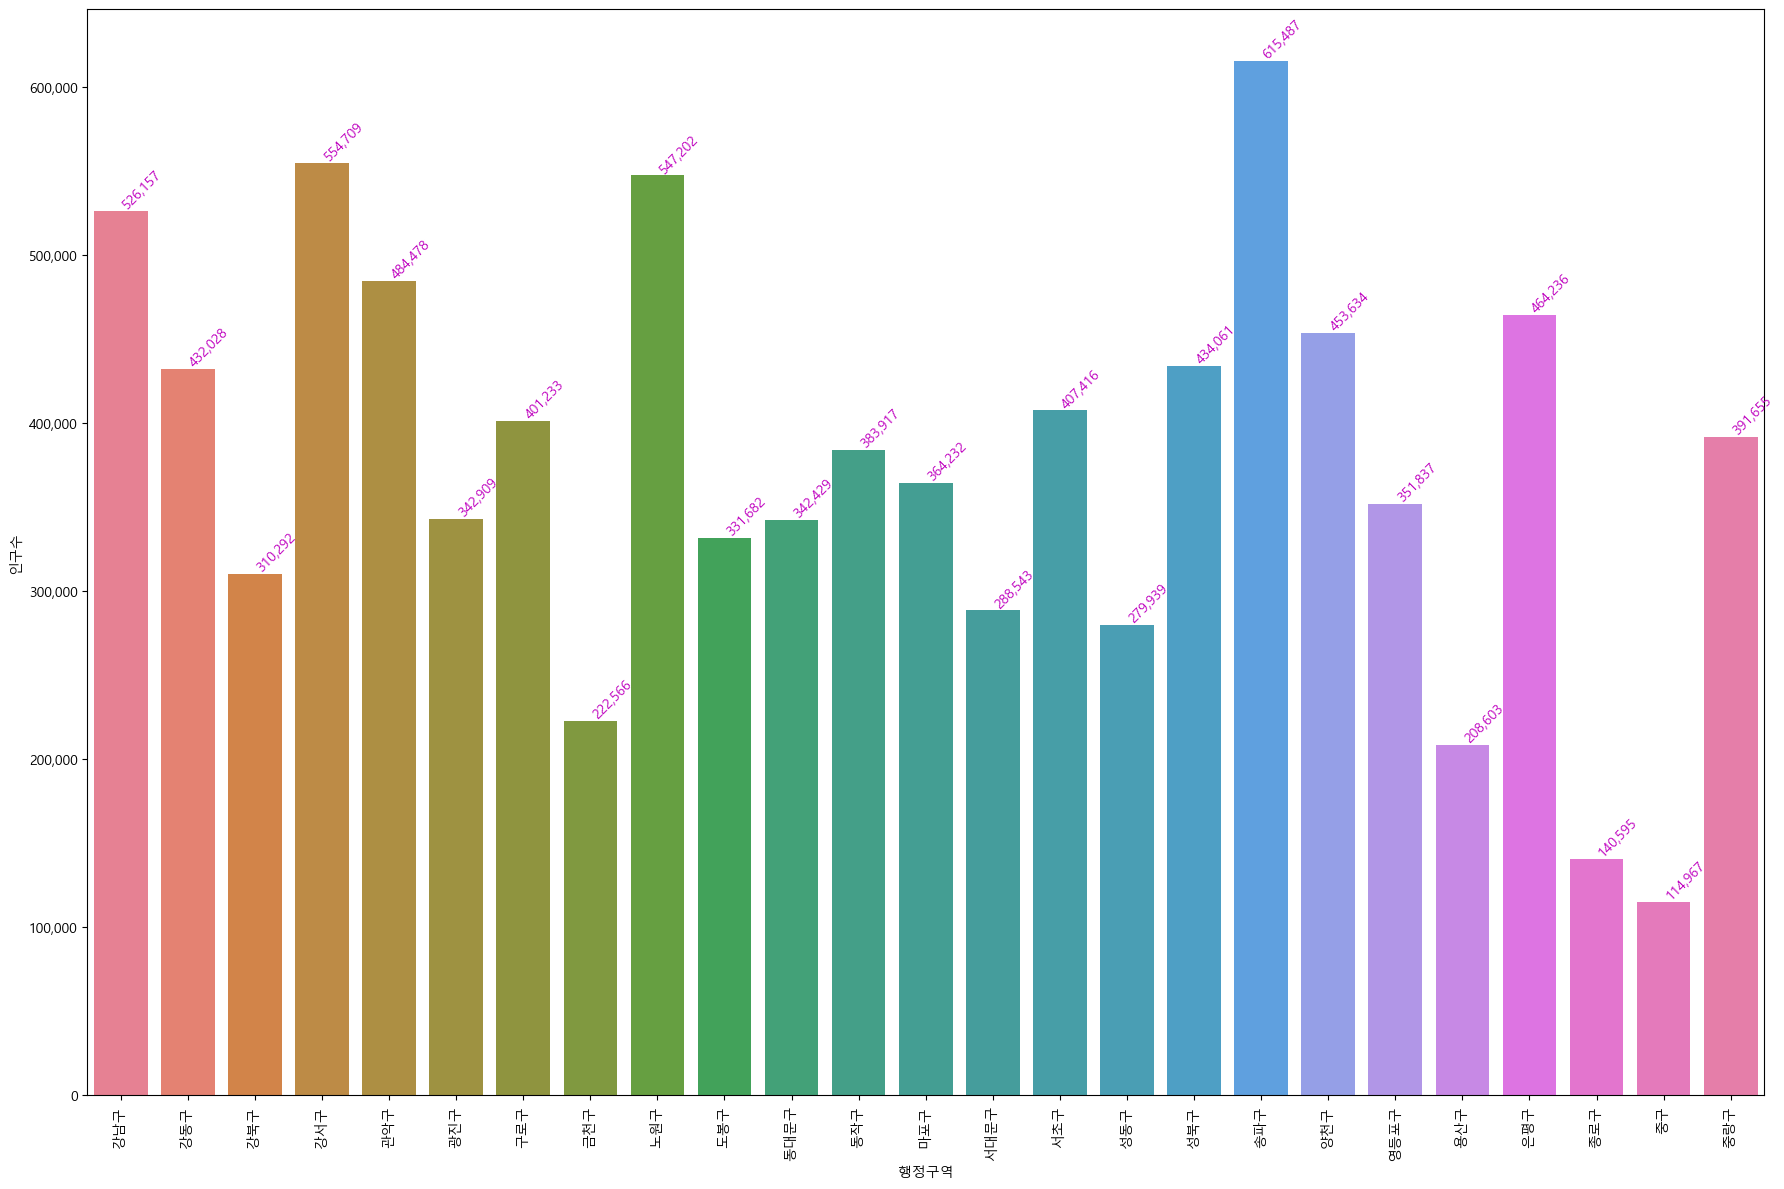

In [343]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1,hue='행정구역')

#y축의 label값에 ,(콤마) 출력하기
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


for item in ax1.get_xticklabels(): 
    item.set_rotation(90) # 글자 회전
for i, v in enumerate(seoul_df["인구수"].items()):
    ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45) 
plt.tight_layout() #여백없이